# HW5 

In [12]:
import requests
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 

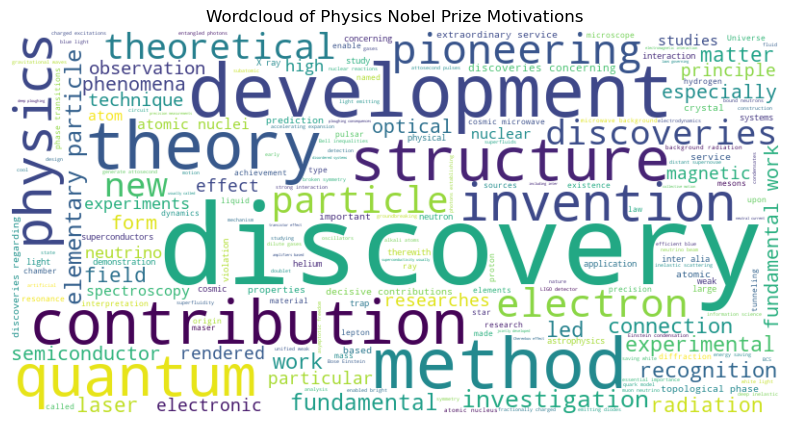

In [13]:
nobel_URL = "https://api.nobelprize.org/v1/prize.json"

# fetch data from the URL
response = requests.get(nobel_URL)

nobel_data = response.json()

# extract motivations for Physics laureates by iterating through all prizes
# filter for only physics
# for each physics prize, iterate through the lauratues
# extract motivation if exists
motivations = [
    laureate['motivation'] # 
    for prizes in nobel_data['prizes'] if prizes.get('category') == 'physics'
    for laureate in prizes.get('laureates', []) if 'motivation' in laureate
]
# join all the extraced motivations from aove into a single string
text = " ".join(motivations)



wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Physics Nobel Prize Motivations")
plt.show()

# Web Scraping

Using the link https://books.toscrape.com/ we will scrape data from the first three pages in total resulting in 60 datapoints. 

In [ ]:
url_template = "http://books.toscrape.com/catalogue/page-{}.html"
data = []

# scrape the first 3 pages
for page in range(1, 4):
    url = url_template.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        # extract Title, Price, Rating
        title = book.h3.a['title']
        price = book.find("p", class_="price_color").text[1:]
        rating = book.p['class'][1]

        # extract UPC by navigating to the product page
        book_url = "http://books.toscrape.com/catalogue/" + book.h3.a['href']
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.text, 'html.parser')
        upc = book_soup.find("th", text="UPC").find_next("td").text

        # append the data
        data.append({'UPC': upc, 'Title': title, 'Price': price, 'Rating': rating})

# create a DataFrame
df = pd.DataFrame(data)
df.head(5)

C:\Users\sebas\AppData\Local\Temp\ipykernel_7488\1763529395.py:21: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  upc = book_soup.find("th", text="UPC").find_next("td").text


,UPC,Title,Price,Rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
